# Natural product classification from BGCs

Apply the trained model to classify natural products from BGCs, based on [Walkter & Clardy, 2021](https://pubs.acs.org/doi/10.1021/acs.jcim.0c01304).

Briefly, Allison S. Walker and Jon Clardy present an innovative method combining machine learning and bioinformatics to predict the biological activities of natural products from their biosynthetic gene clusters (BGCs). This approach fills a critical gap in current bioinformatics capabilities, enabling the prediction of bioactivities like antibiotic and antifungal properties with up to 80% accuracy. Utilizing a dataset of known BGCs, the authors trained machine learning models, including random forests and support vector machines, to identify specific biosynthetic enzymes and molecular features associated with bioactivity. This method, which showed balanced accuracies between 57% to 80% in various tests, represents a significant advancement in natural product research and holds promise for accelerating the discovery of new antibiotics and therapeutic agents.

## Flatten input directories

In [23]:
from pathlib import Path
from src.helper_functions import flatten_input_directory

antiSMASH_nested_dir = Path("/home/robaina/Documents/NewAtlantis/bioprospecting/data/sola/sola_antismash_v5")
rgi_nested_dir = Path("/home/robaina/Documents/NewAtlantis/bioprospecting/data/sola/sola_rgi")
antiMASH_output = Path("/home/robaina/Documents/NewAtlantis/bioprospecting/data/sola/antiSMASH_output")
rgi_output = Path("/home/robaina/Documents/NewAtlantis/bioprospecting/data/sola/RGI_output")

flatten_input_directory(antiSMASH_nested_dir, antiMASH_output, ".gbk")
flatten_input_directory(rgi_nested_dir, rgi_output, ".txt")

## Run docker

In [1]:
%%bash 

work_dir="/home/robaina/Documents/NewAtlantis/bioprospecting/Natural-product-function"
input_dir="/home/robaina/Documents/NewAtlantis/bioprospecting/data/sola"
output_dir="/home/robaina/Documents/NewAtlantis/bioprospecting/data/sola/classified_bgcs"

bash src/classify_products.sh \
    -w "$work_dir" \
    -i "$input_dir" \
    -o "$output_dir" >/dev/null

## Example output file

In [2]:
from src.helper_functions import parse_activity_classifier_file

df = parse_activity_classifier_file('data/sola/classified_bgcs/ERR2604071-1.region001.txt')
df

,tree_classifier,logistic_regression_classifier,svm_classifier
antibacterial,0.560000,0.473250,0.693894
anti-gram_positive,0.410000,0.632804,0.461735
anti-gram_negative,0.600000,0.509719,0.445110
antifugnal_antitumor_cytotoxic,0.240000,0.273824,0.230813
antifungal,0.183231,0.192202,0.169082
antitumor_cytotoxic,0.061620,0.036480,0.066080


## Bioactivity results across identified BGCs

In [1]:
from src.helper_functions import compile_natural_product_data

results = compile_natural_product_data(
    'data/sola/classified_bgcs',
    'mean',

    classification_cutoff=0.7
    )
results.to_csv('data/sola/compiled_natural_product_data.tsv', sep='\t')
results.head()

,antibacterial,anti-gram_positive,anti-gram_negative,antifugnal_antitumor_cytotoxic,antifungal,antitumor_cytotoxic
ERR2604075-18.region001,0,0,0,0,0,0
ERR2604091-31.region001,0,0,0,0,0,0
ERR2604094-1.region001,0,0,0,0,0,0
ERR2604073-2.region001,0,0,0,0,0,0
ERR2604095-20.region001,0,0,0,0,0,0


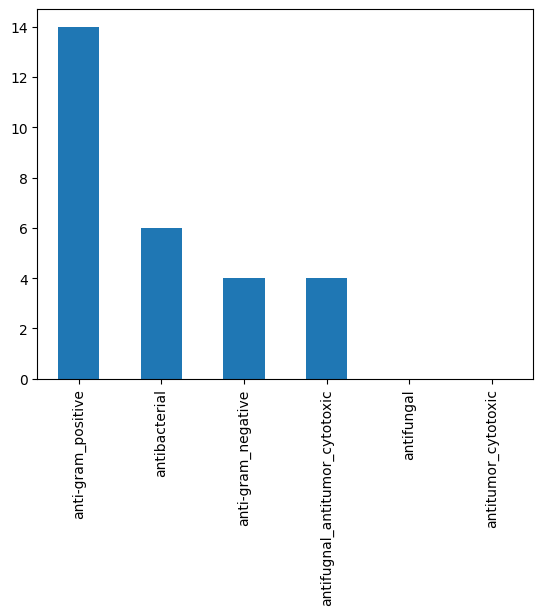

In [2]:
ax = results.sum(axis=0).sort_values(ascending=False).plot.bar()

Bar plot summarizing the predicted bioactivity profiles of BGCs identified in the SOLA marine metagenomic samples. Utilizing the machine learning method established by Walker and Clardy, this analysis displays the number of BGCs exceeding a 0.7 mean probability threshold for biological activity predictions across decision trees, support vector machines, and logistic regression. The bioactivity categories include anti-Gram-positive, antibacterial, anti-Gram-negative, antitumor-cytotoxic, and antifungal activities, with anti-Gram-positive activity registering the highest number of hits in this dataset

## List BGCs with activity hits

In [3]:
bioactive_bgcs = results[results.sum(axis=1) > 0]
bioactive_bgcs

,antibacterial,anti-gram_positive,anti-gram_negative,antifugnal_antitumor_cytotoxic,antifungal,antitumor_cytotoxic
ERR2604079-2.region001,0,1,0,0,0,0
ERR2604100-5.region001,1,0,0,0,0,0
ERR2604104-26.region001,0,1,0,0,0,0
ERR2604104-6.region001,1,1,0,0,0,0
ERR2604094-11.region001,0,1,0,0,0,0
ERR2604094-20.region001,1,1,0,0,0,0
ERR2604108-3.region001,0,1,0,0,0,0
ERR2604086-10.region001,0,0,1,0,0,0
ERR2604081-3.region001,0,0,0,1,0,0
ERR2604093-22.region001,0,0,0,1,0,0


## Map functional annotations to BGCs with predicted bioactivity

In [6]:
from pathlib import Path
from src.helper_functions import parse_metadata, parse_correspondence, assign_metadata_to_bgcs

metadata_file_path = Path('compdiv_plots_emi/data/sola/tables/1-bgc_metadata.tsv')
correspondence_file_path = Path('data/sola/sola_long2short_headers.tsv')

# Parsing the metadata and correspondence
metadata = parse_metadata(metadata_file_path)
correspondence = parse_correspondence(correspondence_file_path)

# Assigning metadata to BGCs
bgcs_metadata = assign_metadata_to_bgcs(bioactive_bgcs.index.to_list(), metadata, correspondence)
bgcs_metadata

,function,taxonomy,novelty,gcf_id
new_id,,,,
ERR2604079-2,terpene,-_cellular organisms;d_Bacteria,1.011421,80
ERR2604100-5,T3PKS,-_cellular organisms;d_Bacteria;-_Terrabacteri...,0.977505,497
ERR2604104-26,betalactone,-_cellular organisms;d_Bacteria;p_Pseudomonado...,1.271389,133
ERR2604104-6,terpene,-_cellular organisms;d_Bacteria,1.018969,807
ERR2604094-11,terpene,-_cellular organisms,1.009071,807
ERR2604094-20,hserlactone,-_cellular organisms;d_Bacteria;p_Pseudomonado...,1.240838,240
ERR2604108-3,phosphonate,-_cellular organisms;d_Bacteria,1.228529,16
ERR2604086-10,betalactone,-_cellular organisms;d_Bacteria,1.177396,277
ERR2604081-3,betalactone,-_cellular organisms;d_Bacteria;-_Terrabacteri...,1.151853,192
